## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 

- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} $
  
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<br /><sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



$\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\
 &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\
 &=& 7 \end{matrix}$

$\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\
  &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\
  &=& 2 \end{matrix}$

   <br>

$ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\
  &=& 1 \end{matrix} $
  
$ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\
   &=& 1 \end{matrix} $
  
  <br>

$ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\
  &=& y \times 1 \\ 
  &=& 7 \times 1 = 7 \\
  &=& 7  \end{matrix} $
    
$ \quad \begin{matrix} \frac{\partial f}{\partial b}\ 
  &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\
  &=& 1 \times 7 + 2 \times 1  \\
  &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad f = x + y$ 일 때,
  ## $\frac{\partial f}{\partial x} = 1, \frac{\partial f}{\partial y} = 1 $

  #### 2. $\quad f = xy$ 일 때,
  ## $\frac{\partial f}{\partial x} = y, \frac{\partial f}{\partial y} = x$


In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [50]:
# 곱셈 순전파 및 역전파
class Mul():

    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = self.x * self.y
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [51]:
# 덧셈 순전파 및 역전파
class Add():

    def __init__(self):
        self.x = None
        self.y = None
            
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = self.x + self.y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [52]:
a, b, c = -1, 3, 4

x = Add()
y = Add()
f = Mul()

In [53]:
x_result = x.forward(a, b)
y_result = y.forward(b, c)
f_result = f.forward(x_result, y_result)

print(x_result)
print(y_result)
print(f_result)

2
7
14


In [54]:
dout = 1
dx, dy = f.backward(1)
da, db_1 = x.backward(dx)
db_2, dc = y.backward(dy)

print("dx: {}".format(dx))
print("dy: {}".format(dy))
print("da: {}".format(da))
print("db: {}".format(db_1 + db_2))
print("dc: {}".format(dc))

dx: 7
dy: 2
da: 7
db: 9
dc: 2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<br /><sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식 
  #### $\quad y = \frac{1}{1 + e^{-x}} 일 때$,

  $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\
  &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\
  &=& y\ (1\ - \ y)
  \end{matrix}$

In [55]:
class Sigmoid():

    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
        
    def backward(self, dout):
        dx = dout * (self.out * (1.0 - self.out))
        return dx

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  $\qquad y=
  \begin{cases}
  x & (x > 0)  \\
  0 & (x \le 0)
  \end{cases}$ 일 때,

  <br>

  $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x > 0)  \\
  0 & (x \le 0)
  \end{cases}$

In [56]:
class ReLU():

    def __init__(self):
        self.mask = None

    def forward(self, x):
        out = x.copy()
        self.mask = (x <= 0)
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [57]:
np.random.seed(1)
X = np.random.rand(3)
W = np.random.randn(X.shape[0], 2)
b = np.random.randn(W.shape[1])

print(X.shape)
print(X, end="\n\n")
print(W.shape)
print(W, end="\n\n")
print(b.shape)
print(b)

(3,)
[4.17022005e-01 7.20324493e-01 1.14374817e-04]

(3, 2)
[[-0.80217284 -0.44887781]
 [-1.10593508 -1.65451545]
 [-2.3634686   1.13534535]]

(2,)
[-1.01701414  0.63736181]


In [58]:
Y = np.dot(X, W) + b
print(Y.shape)
print(Y)

(2,)
[-2.14844031 -0.74148826]


In [59]:
# shape이 안 맞을 때
np.random.seed(1)
X = np.random.rand(3)
W = np.random.randn(2, 2)
b = np.random.rand(2)

print(X.shape)
print(X, end="\n\n")
print(W.shape)
print(W, end="\n\n")
print(b.shape)
print(b)

(3,)
[4.17022005e-01 7.20324493e-01 1.14374817e-04]

(2, 2)
[[-0.80217284 -0.44887781]
 [-1.10593508 -1.65451545]]

(2,)
[0.53881673 0.41919451]


In [61]:
Y = np.dot(X, W) + b
print(Y.shape)
print(Y)

ValueError: shapes (3,) and (2,2) not aligned: 3 (dim 0) != 2 (dim 0)

#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$

- ![](2023-05-18-16-49-33.png)



In [62]:
np.random.seed(1)
X = np.random.rand(2)
W = np.random.randn(X.shape[0], 3)
Y = np.dot(X, W)

print("X\n{}".format(X))
print("W\n{}".format(W))
print("Y\n{}".format(Y))

X
[0.417022   0.72032449]
W
[[-0.52817175 -1.07296862  0.86540763]
 [-2.3015387   1.74481176 -0.7612069 ]]
Y
[-1.87811394  0.80937912 -0.18742195]


In [63]:
np.random.seed(1)
dL_dY = np.random.rand(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))

dL_dY
[4.17022005e-01 7.20324493e-01 1.14374817e-04]
dL_dX
[-0.99304584  0.29695131]
dL_dW
[[1.73907352e-01 3.00391164e-01 4.76968156e-05]
 [3.00391164e-01 5.18867376e-01 8.23869824e-05]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [64]:
np.random.seed(1)
X = np.random.randn(2)
W = np.random.randn(X.shape[0], 3)
b = np.random.rand(3)
Y = np.dot(X, W) + b

print("X\n{}".format(X))
print("W\n{}".format(W))
print("b\n{}".format(b))
print("Y\n{}".format(Y))

X
[ 1.62434536 -0.61175641]
W
[[-0.52817175 -1.07296862  0.86540763]
 [-2.3015387   1.74481176 -0.7612069 ]]
b
[0.20445225 0.87811744 0.02738759]
Y
[ 0.75449997 -1.93215396  1.89878167]


In [65]:
np.random.seed(1)
dL_dY = np.random.rand(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_db = dL_dY

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_db\n{}".format(dL_db))

dL_dY
[4.17022005e-01 7.20324493e-01 1.14374817e-04]
dL_dX
[-0.99304584  0.29695131]
dL_dW
[[ 6.77387760e-01  1.17005575e+00  1.85784204e-04]
 [-2.55115886e-01 -4.40663129e-01 -6.99695281e-05]]
dL_db
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [66]:
# 순전파
np.random.seed(1)
X = np.random.rand(4, 3)
W = np.random.randn(X.shape[1], 2)
b = np.random.rand(2)

print(X.shape)
print(W.shape)
print(b.shape)

(4, 3)
(3, 2)
(2,)


In [67]:
print("X\n{}".format(X))
print("W\n{}".format(W))
print("b\n{}".format(b))

X
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]]
W
[[ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]]
b
[0.80074457 0.96826158]


In [68]:
Y = np.dot(X, W) + b
print("Y\n{}".format(Y))
print("Y.shape: {}".format(Y.shape))

Y
[[ 1.98694617 -0.6197451 ]
 [ 1.08200188  0.55506796]
 [ 1.23749128  0.0575298 ]
 [ 1.36462924 -0.29286457]]
Y.shape: (4, 2)


In [69]:
# 역전파
np.random.seed(1)
dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_db\n{}".format(dL_db))

dL_dY
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]]
dL_dX
[[ 0.6707836   3.63527254 -0.28876918]
 [ 0.09905915  1.43822223  0.58236993]
 [ 0.85003444  6.00681293  0.60489365]
 [ 0.74648562  4.11929645 -0.27021251]]
dL_dW
[[ 1.61902902 -1.41834535]
 [ 2.12300985 -1.71254274]
 [ 1.49035979 -1.53391589]]
dL_db
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


In [70]:
class Layer():

    def __init__(self):
        np.random.seed(1)
        self.x = None
        self.W = np.random.randn(3, 2)
        self.b = np.random.rand(2)
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b        
        return out
    
    def backward(self, dout):
        dL_dX = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dL_dX, self.dW, self.db

In [71]:
# 순전파
layer = Layer()
X = np.random.rand(2, 3)
Y = layer.forward(X)

print("Y\n{}".format(Y))

Y
[[ 0.31120019 -0.44508154]
 [ 1.77135114 -1.45854452]]


In [72]:
# 역전파
np.random.seed(1)
dL_dY = np.random.rand(2, 2)
dL_dX, dL_dW, dL_db = layer.backward(dL_dY)

print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_db\n{}".format(dL_db))

dL_dX
[[ 0.23672463 -0.99314482 -1.29696067]
 [-0.18476811 -0.32445377 -0.69573113]]
dL_dW
[[0.08533777 0.34997613]
 [0.36624202 0.75869433]
 [0.01148513 0.18863809]]
dL_db
[0.41713638 1.02265707]


### MNIST 분류 with 역전파


#### Modules Import

In [264]:
import tensorflow as tf
import numpy as np
from collections import OrderedDict

#### 데이터 로드

In [265]:
np.random.seed(1)

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


#### 데이터 전처리

In [266]:
def mnist_for_flatten(x):
    temp = np.zeros((x.shape[0], x[0].size))

    for idx, data in enumerate(x):
        temp[idx, :] = data.flatten()
    
    return temp.astype(np.float32)

In [267]:
X_train, X_test = mnist_for_flatten(X_train) / .255, mnist_for_flatten(X_test) / .255
y_train, y_test = tf.one_hot(y_train, depth=10).numpy(), tf.one_hot(y_test, depth=10).numpy()

In [268]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


#### Hyper Parameters

In [269]:
epochs = 1000
learning_rate = 1e-3
batch_size = 100
train_size = X_train.shape[0]

#### Util Functions
- https://techblog-history-younghunjo1.tistory.com/372?category=1021615
- https://techblog-history-younghunjo1.tistory.com/376
- https://stellarway.tistory.com/21
- https://deep-learning-study.tistory.com/18
- https://dokylee.tistory.com/37
- https://velog.io/@ksj5738/%EC%97%AD%EC%A0%84%ED%8C%8C-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0

In [270]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        exp_x = np.exp(x)
        sum_exp_x = np.sum(exp_x, axis=0)
        y = exp_x / sum_exp_x
        return y.T
    
    x = x - np.max(x)
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

def mean_squared_error(pred_y, true_y):
    return np.mean(np.square(true_y - pred_y))

def cross_entropy_error(pred_y, true_y):
    delta = 1e-7
    if pred_y.ndim == 1:
        pred_y = pred_y.reshape(1, pred_y.size)
        true_y = true_y.reshape(1, true_y.size)
   
    if true_y.size == pred_y.size:
        true_y = true_y.argmax(axis=1)

    batch_size = pred_y.shape[0]
    return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + delta)) / batch_size

def softmax_loss(x, true_y):
    pred_y = softmax(x)
    return cross_entropy_error(pred_y, true_y)

#### Util Classes

##### ReLU
![](2023-05-22-10-58-45.png)

In [271]:
class ReLU():

    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = ( x<= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

##### Sigmoid
![](2023-05-19-23-07-19.png)
![](2023-05-19-23-07-34.png)

In [272]:
class Sigmoid():

    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * ((1 - self.out) * self.out)
        return dx

##### Layer

In [273]:
class Layer():

    def __init__(self, W, b):
        self.x = None
        self.x_origin_shape = None

        self.W = W
        self.b = b

        self.dL_dW = None
        self.dL_db = None

    def forward(self, x):
        # x에 대한 역전파를 수행할 때 모양이 바뀌어 버린 x의 형상을 원래대로 돌려 놓기 위해 원본 x의 형상을 저장
        # x의 미준값의 형상은 x와 똑같아야 함
        self.x_origin_shape = x.shape

        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        # 미분값을 입력값 x의 형상으로 다시 바꿔줌
        dx = dx.reshape(*self.x_origin_shape)
        self.dL_dW = np.dot(self.x.T, dout)
        self.dL_db = np.sum(dout, axis=0)
        return dx

#### Softmax
![](2023-05-19-23-08-56.png)

In [274]:
class Softmax():

    def __init__(self):
        self.t = None
        self.y = None
        self.loss = None
    
    def forward(self, x, true_y):
        self.y = softmax(x)
        self.t = true_y
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1.0):
        batch_size = self.t.shape[0]

        # t가 원-핫 벡터일  경우
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        # t가 원-핫 벡터가 아닐 경우
        else:
            dx = self.y.copy()
            # 원-핫 벡터가 아닐 경우 t는 정답 레이블의 인덱스로 생각할 수 있음
            # y = [0.2, 0.1, 0.7](softmax 순전파로 나온 확률값), t = 2(1의 확률값을 가짐)
            # dx[0, 2] = 0.7 => 0.7 - 1 => -0.3의 오차가 발생
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        return dx

![](2023-05-20-21-37-09.png)

In [279]:
class MyModel():

    def __init__(self, input_nodes, hidden_size_list, output_units, activation="relu"):
        self.input_nodes = input_nodes
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.output_units = output_units
        
        # 가중치와 편향을 담을 params
        self.params = {}
        self.__init_weights(activation)

        # activation 딕셔너리
        activation_layer = {"sigmoid": Sigmoid, "relu": ReLU}

        # 각 층에 대한 정보를 담을 layers
        self.layers = OrderedDict()

        # 은닉층 생성
        for idx in range(1, self.hidden_layer_num + 1):
            self.layers["Layer" + str(idx)] = Layer(self.params["W" + str(idx)], self.params["b" + str(idx)])
            self.layers["Activation_function" + str(idx)] = activation_layer[activation]()
        print(self.layers)
        
        # 출력층 생성
        idx = self.hidden_layer_num + 1

        self.layers["Layer" + str(idx)] = Layer(self.params["W" + str(idx)], self.params["b" + str(idx)])
        self.last_layer = Softmax()
    
    def __init_weights(self, activation):
        # [784, 100, 64, 32, 10]
        all_size_list = [self.input_nodes] + self.hidden_size_list + [self.output_units]

        for idx in range(1, len(all_size_list)): # range(1, 5) => 1, 2, 3, 4
            if activation.lower() == "relu": 
                weight_std = np.sqrt(2.0 / self.input_nodes)
            elif activation.lower() == "sigmoid":
                weight_std = np.sqrt(1.0 / self.input_nodes)
            
            self.params["W" + str(idx)] = weight_std * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params["b" + str(idx)] = np.random.randn(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        loss = self.last_layer.forward(pred_y, true_y)
        return loss
    
    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        y_argmax = pred_y.argmax(axis=1)

        # true_y가 원-핫 벡터일 때
        if true_y.ndim != 1:
            t_argmax = true_y.argmax(axis=1)
        else:
            t_argmax = true_y

        accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        return accuracy
    
    def gradient(self, x, true_y):
        self.loss(x, true_y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        for idx in range(1, self.hidden_layer_num + 2):
            grads["W" + str(idx)] = self.layers["Layer" + str(idx)].dL_dW
            grads["b" + str(idx)] = self.layers["Layer" + str(idx)].dL_db

        return grads

#### 모델 생성 및 학습

In [280]:
model = MyModel(28*28, [100, 64, 32], 10, activation="relu")

OrderedDict([('Layer1', <__main__.Layer object at 0x16b3d4a90>), ('Activation_function1', <__main__.ReLU object at 0x16b37f2e0>), ('Layer2', <__main__.Layer object at 0x106e45d30>), ('Activation_function2', <__main__.ReLU object at 0x16b7b4c40>), ('Layer3', <__main__.Layer object at 0x294128340>), ('Activation_function3', <__main__.ReLU object at 0x2941564c0>)])


In [281]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [282]:
for epoch in range(epochs):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = model.gradient(x_batch, y_batch)

    for key in grads.keys():
        model.params[key] -= learning_rate * grads[key]
    
    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if epoch % 50 == 49:
        train_accuracy = model.accuracy(X_train, y_train)
        test_accuracy = model.accuracy(X_test, y_test)
        train_acc_list.append(train_accuracy)
        test_acc_list.append(test_accuracy)
        print("Epoch: {}, Train Accuracy: {}, Test Accuracy: {}, Cost: {}".format(epoch + 1, train_accuracy, test_accuracy, loss))

Epoch: 50, Train Accuracy: 0.5038333333333334, Test Accuracy: 0.5163, Cost: 1.4709151641023395
Epoch: 100, Train Accuracy: 0.6326833333333334, Test Accuracy: 0.6471, Cost: 1.026318875729686
Epoch: 150, Train Accuracy: 0.71215, Test Accuracy: 0.7203, Cost: 0.7919141001377689
Epoch: 200, Train Accuracy: 0.7532666666666666, Test Accuracy: 0.756, Cost: 0.7925643057310344
Epoch: 250, Train Accuracy: 0.7842833333333333, Test Accuracy: 0.7903, Cost: 0.6168676347152471
Epoch: 300, Train Accuracy: 0.7976333333333333, Test Accuracy: 0.8038, Cost: 0.6428446250309032
Epoch: 350, Train Accuracy: 0.82335, Test Accuracy: 0.8264, Cost: 0.3792380330285509
Epoch: 400, Train Accuracy: 0.83605, Test Accuracy: 0.838, Cost: 0.5519740157296309
Epoch: 450, Train Accuracy: 0.8487333333333333, Test Accuracy: 0.8502, Cost: 0.3828721481904271
Epoch: 500, Train Accuracy: 0.8512666666666666, Test Accuracy: 0.8537, Cost: 0.4583409303854779
Epoch: 550, Train Accuracy: 0.8621166666666666, Test Accuracy: 0.8652, Cost: 

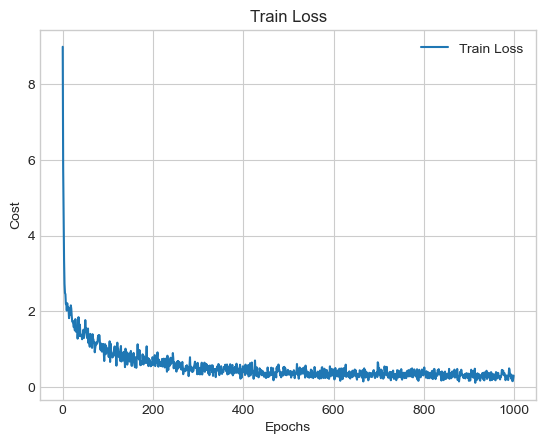

In [287]:
plt.plot(np.arange(1000), train_loss_list, label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

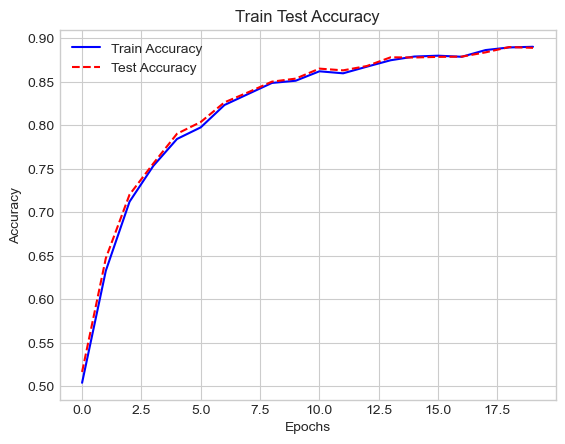

In [288]:
plt.plot(np.arange(1000 // 50), train_acc_list, "b", label="Train Accuracy")
plt.plot(np.arange(1000 // 50), test_acc_list, "r--", label="Test Accuracy")
plt.title("Train Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()